# Credit Card Approval Prediction models

## Introduction and Background

Encouraging cashless transactions has been one of the most important aspects of today's digitized world. Most people prefer to use a Credit or Debit card. But there is also high risk that the facilities could be used for fraudulent purposes and hence financial institutions make sure that all credit card appliers fill out a form, obtaning as much information as possible to assess if the applier is a legitimate one. This could include various things like gender, marital status and even previous debt. This is for the institutions to ensure that they wouldn't be responsible for any fraud and make sure that the other customers using these kind of services are protected.


There would definitely be curiosity among people to know if their background and profile would land them with the digitized card. It could be even companies who are curious about such predictions. The purpose of this project is to use some Machine Learning models to make prediction models and inspect which model could be best used to make such predictions. The project makes use of a dataset, which would be cleaned and modified to refine our testing.

# Methodology

In [1]:
#All the imports required for this project

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn import tree

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import statsmodels.api as sm



/Users/rishikajuloori/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data loading and cleaning

In [2]:
#Reading the data
data = pd.read_csv('crx.data', header = None)

#Naming the columns since they are not named in the actual file
data.columns = ['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'ApprovalStatus']
print('Length of the data:', len(data))

#The zipcode column has been dropped since it is usually only for information purposes
#and is not very helpful in predicting the approval
data = data.drop(columns=['ZipCode'])

#displaying the first few rows of the loaded data
data.head(85)

Length of the data: 690


,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,b,49.58,19.000,u,g,ff,ff,0.000,t,t,1,f,g,0,-
81,a,27.67,1.500,u,g,m,v,2.000,t,f,0,f,s,0,-
82,b,39.83,0.500,u,g,m,v,0.250,t,f,0,f,s,0,-
83,a,?,3.500,u,g,d,v,3.000,t,f,0,t,g,0,-


In [3]:
#Dropping all th empty or NaN values
data = data.dropna()
print('Length of the data(after dropping NaN values):', len(data))

Length of the data(after dropping NaN values): 690


The length of the data after dropping suggests that there are no empty cells. But there could be some which are represented by something unusual.

In [4]:
#We are displaying the information of all the columns to see if there is any abnormality.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  Income          690 non-null    int64  
 14  ApprovalStatus  690 non-null    object 
dtypes: float64(2), int64(2), object(11)
memory usage: 86.2+ KB


We see that the 'Age' column is supposed to be a float type but it depicts it as object type. We need to change it to float type and fix the missing values

In [5]:
print(data['Age'].astype(float))

ValueError: could not convert string to float: '?'

This means that the missing values are depicted as '?' and we could replace them with its mean value.

In [6]:
data['Age'] = data['Age'].replace('?',np.nan)
data['Age'] = data['Age'].astype(float)
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [7]:
#This is to see if there are any missing values
data.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
Income            0
ApprovalStatus    0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  Income          690 non-null    int64  
 14  ApprovalStatus  690 non-null    object 
dtypes: float64(3), int64(2), object(10)
memory usage: 86.2+ KB


## Replacing Approval Status values with some binary values

In [9]:
data['ApprovalStatus'] = data['ApprovalStatus'].replace('+', 1)
data['ApprovalStatus'] = data['ApprovalStatus'].replace('-', 0)
data

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,0,0
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,394,0
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,1,0
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,750,0


0    383
1    307
Name: ApprovalStatus, dtype: int64


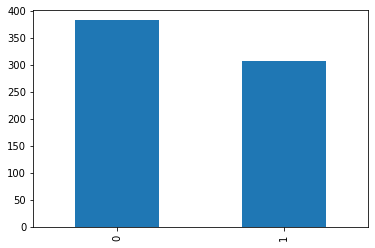

In [10]:
# We are checking to see if the data is balanced
data['ApprovalStatus'].value_counts().plot(kind='bar')
print(data['ApprovalStatus'].value_counts())

The data seems to be balanced enough, but the number of cases with negative approvals are higher than that of positive.

## Data Manipulation

        Some of the columns of our dataset are depicted with alphabets and non numeric values. Not all of the models accept such a setting of data tp train themselves. They mostly require something that has a numeric value. The code below uses the LabelEncoder function from the LabelEncoder library. The function of a LabelEndcoder is that, it encodes unique values of the data of a particular column with integer values,starting from 0 and continuing until all the unique values reach an end.

In [11]:
Encoder = LabelEncoder()

for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = Encoder.fit_transform(data[column])
data

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,ApprovalStatus
0,2,30.83,0.000,2,1,13,8,1.25,1,1,1,0,0,0,1
1,1,58.67,4.460,2,1,11,4,3.04,1,1,6,0,0,560,1
2,1,24.50,0.500,2,1,11,4,1.50,1,0,0,0,0,824,1
3,2,27.83,1.540,2,1,13,8,3.75,1,1,5,1,0,3,1
4,2,20.17,5.625,2,1,13,8,1.71,1,0,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,2,21.08,10.085,3,3,5,4,1.25,0,0,0,0,0,0,0
686,1,22.67,0.750,2,1,2,8,2.00,0,1,2,1,0,394,0
687,1,25.25,13.500,3,3,6,3,2.00,0,1,1,1,0,1,0
688,2,17.92,0.205,2,1,1,8,0.04,0,0,0,0,0,750,0


    We will now try to find those columns which are not really necessary for our prediction.

<AxesSubplot:>

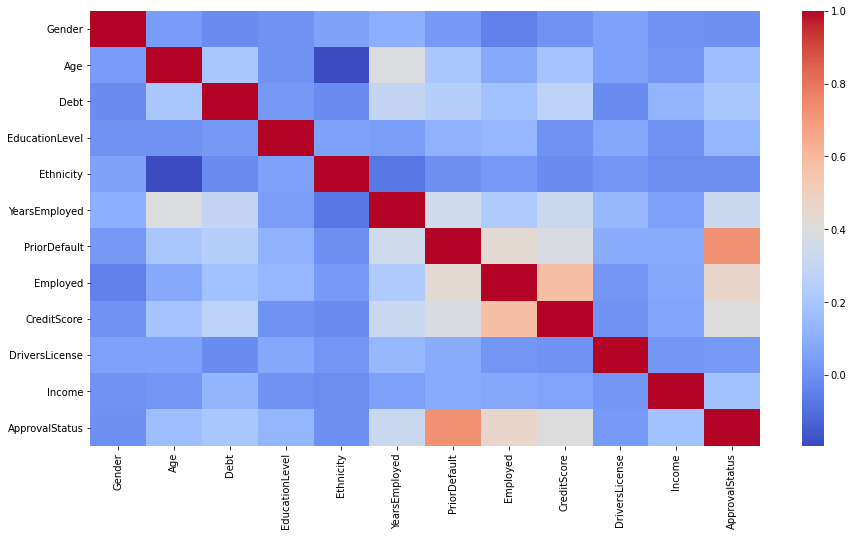

In [27]:
# Finding the correlation of each feature with each other to see which ones we could discard.
corr_matrix = data.corr()
plt.figure(figsize = (15,8))
sns.heatmap(corr_matrix, annot = False, cmap = 'coolwarm')

We see that the 'Married', 'BankCustomer' and 'citizen' features do not have a high correlationality and hence we can drop those columns.

In [13]:
data = data.drop(['Married','BankCustomer','Citizen'], axis = 1)

## Splitting data

In [14]:
#Every column except the last decider column is considered a feature
features = data.drop(['ApprovalStatus'],1)

#Approval status is the decider column
labels = data['ApprovalStatus']

/Users/rishikajuloori/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [15]:
# Splitting the data into train and test data
# 25% of the data would be for testing and the rest 75% will go for training.

train_vectors, test_vectors, train_labels, test_labels = train_test_split(features, labels, test_size=0.25)
print("Training features length:", len(train_vectors))
print("Training labels length:", len(train_labels))
print("Testing features length:", len(test_vectors))
print("Testing features length:", len(test_labels))
train_vectors

Training features length: 517
Training labels length: 517
Testing features length: 173
Testing features length: 173


,Gender,Age,Debt,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Income
280,2,21.17,0.875,2,4,0.250,0,0,0,0,204
184,1,22.42,5.665,11,8,2.585,1,1,7,0,3257
303,1,15.92,2.875,11,8,0.085,0,0,0,0,0
228,2,19.67,0.375,11,8,2.000,1,1,2,1,0
660,2,22.25,9.000,1,8,0.085,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
116,2,37.75,7.000,11,4,11.500,1,1,7,1,5
190,2,21.33,10.500,2,8,3.000,1,0,0,1,0
15,2,36.67,4.415,9,8,0.250,1,1,10,1,0
356,2,41.17,1.335,4,8,0.165,0,0,0,0,0


## Logistic Regression

In [16]:
sm.add_constant(test_vectors)
logit_model = sm.Logit(train_labels, sm.add_constant(train_vectors))
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.338952
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:         ApprovalStatus   No. Observations:                  517
Model:                          Logit   Df Residuals:                      505
Method:                           MLE   Df Model:                           11
Date:                Mon, 02 May 2022   Pseudo R-squ.:                  0.5067
Time:                        22:44:05   Log-Likelihood:                -175.24
converged:                       True   LL-Null:                       -355.21
Covariance Type:            nonrobust   LLR p-value:                 1.907e-70
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -3.4684      0.755     -4.592      0.000      -4.949      -1.988
Gender           

/Users/rishikajuloori/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [17]:
prediction = result.predict(sm.add_constant(test_vectors))
prediction_new = []
for i in prediction:
    if i > 0.5:
        prediction_new.append(1)
    elif i < 0.5:
        prediction_new.append(0)
print("Accuracy score:",accuracy_score(test_labels,prediction_new))
print(confusion_matrix(test_labels, prediction_new))

Accuracy score: 0.8786127167630058
[[83 13]
 [ 8 69]]


## Decision Trees

## Underfitting structure

In [31]:
dectrees = tree.DecisionTreeClassifier(max_depth=3)
dectrees.fit(train_vectors,train_labels)

DecisionTreeClassifier(max_depth=3)

In [32]:
dt_train_pred = dectrees.predict(train_vectors)
print("Accuracy for Training set:",accuracy_score(dt_train_pred, train_labels)*100)
print("\n\nClassification Report:\n")
print(classification_report(dt_train_pred, train_labels))


dt_test_pred = dectrees.predict(test_vectors)
print("Accuracy for Testing set:",accuracy_score(dt_test_pred, test_labels)*100)
print("\n\nClassification Report:\n")
print(classification_report(dt_test_pred, test_labels))
print(confusion_matrix(test_labels, dt_test_pred))

Accuracy for Training set: 85.49323017408123


Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.95      0.86       236
           1       0.95      0.78      0.85       281

    accuracy                           0.85       517
   macro avg       0.86      0.86      0.85       517
weighted avg       0.87      0.85      0.85       517

Accuracy for Testing set: 87.86127167630057


Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.93      0.89        87
           1       0.92      0.83      0.87        86

    accuracy                           0.88       173
   macro avg       0.88      0.88      0.88       173
weighted avg       0.88      0.88      0.88       173

[[81 15]
 [ 6 71]]


## Overfitting structure 

In [20]:
dectrees = tree.DecisionTreeClassifier(max_depth=15)
dectrees.fit(train_vectors,train_labels)

dt_train_pred = dectrees.predict(train_vectors)
print("Accuracy for Training set:",accuracy_score(dt_train_pred, train_labels)*100)
print("\n\nClassification Report:\n")
print(classification_report(dt_train_pred, train_labels))


dt_test_pred = dectrees.predict(test_vectors)
print("Accuracy for Testing set:",accuracy_score(dt_test_pred, test_labels)*100)
print("\n\nClassification Report:\n")
print(classification_report(dt_test_pred, test_labels))
print(confusion_matrix(test_labels, dt_test_pred))

Accuracy for Training set: 99.03288201160542


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       292
           1       0.98      1.00      0.99       225

    accuracy                           0.99       517
   macro avg       0.99      0.99      0.99       517
weighted avg       0.99      0.99      0.99       517

Accuracy for Testing set: 83.23699421965318


Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        99
           1       0.79      0.82      0.81        74

    accuracy                           0.83       173
   macro avg       0.83      0.83      0.83       173
weighted avg       0.83      0.83      0.83       173

[[83 13]
 [16 61]]


## Good fit

In [30]:
dectrees = tree.DecisionTreeClassifier(max_depth=5)
dectrees.fit(train_vectors,train_labels)

dt_train_pred = dectrees.predict(train_vectors)
print("Accuracy for Training set:",accuracy_score(dt_train_pred, train_labels)*100)
print("\n\nClassification Report:\n")
print(classification_report(dt_train_pred, train_labels))


dt_test_pred = dectrees.predict(test_vectors)
print("Accuracy for Testing set:",accuracy_score(dt_test_pred, test_labels)*100)
print("\n\nClassification Report:\n")
print(classification_report(dt_test_pred, test_labels))
print(confusion_matrix(test_labels, dt_test_pred))

Accuracy for Training set: 88.78143133462282


Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       245
           1       0.97      0.82      0.88       272

    accuracy                           0.89       517
   macro avg       0.90      0.89      0.89       517
weighted avg       0.90      0.89      0.89       517

Accuracy for Testing set: 86.1271676300578


Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        90
           1       0.88      0.82      0.85        83

    accuracy                           0.86       173
   macro avg       0.86      0.86      0.86       173
weighted avg       0.86      0.86      0.86       173

[[81 15]
 [ 9 68]]


## SVM Classifier

In [22]:
#Performing PCA Analysis
n_components = 4

#Set up the pca object with the number of compoents we want to find
pca = PCA(n_components=n_components)

#Fit the training data to the pca model.
_ = pca.fit(train_vectors)

pca_train_vectors = pca.transform(train_vectors)
pca_test_vectors = pca.transform(test_vectors)

In [23]:
# Testing with paramter C as 0.1 and kernel as 'linear'

my_model = SVC(C=0.1,kernel='linear')
my_model.fit(train_vectors,train_labels)

pred_labels = my_model.predict(test_vectors)
print(classification_report(test_labels, pred_labels))
print(confusion_matrix(test_labels, pred_labels))

              precision    recall  f1-score   support

           0       0.93      0.84      0.89        96
           1       0.83      0.92      0.87        77

    accuracy                           0.88       173
   macro avg       0.88      0.88      0.88       173
weighted avg       0.88      0.88      0.88       173

[[81 15]
 [ 6 71]]


In [24]:
# Testing with paramter C as 0.1 and kernel as 'linear' but with pca_train_vectors

my_model = SVC(C=0.1,kernel='linear')
my_model.fit(pca_train_vectors,train_labels)

pred_labels = my_model.predict(pca_test_vectors)
print(classification_report(test_labels, pred_labels))
print(confusion_matrix(test_labels, pred_labels))

              precision    recall  f1-score   support

           0       0.71      0.94      0.81        96
           1       0.87      0.52      0.65        77

    accuracy                           0.75       173
   macro avg       0.79      0.73      0.73       173
weighted avg       0.78      0.75      0.74       173

[[90  6]
 [37 40]]


In [25]:
# Testing with paramter C as 0.1 and kernel as 'rbf'

my_model_rbf = SVC(C=0.1,kernel='rbf')
my_model_rbf.fit(pca_train_vectors,train_labels)

pred_labels_rbf = my_model_rbf.predict(pca_test_vectors)
print(classification_report(test_labels, pred_labels_rbf))
print(confusion_matrix(test_labels, pred_labels_rbf))

              precision    recall  f1-score   support

           0       0.59      0.97      0.74        96
           1       0.81      0.17      0.28        77

    accuracy                           0.61       173
   macro avg       0.70      0.57      0.51       173
weighted avg       0.69      0.61      0.53       173

[[93  3]
 [64 13]]


## Perceptron

In [28]:
per = Perceptron()
per_result = per.fit(train_vectors, train_labels)
prediction_per = per_result.predict(test_vectors)
print('Confusion matrix:')
print(confusion_matrix(test_labels,prediction_per))
print("Classification report:")
print(classification_report(test_labels,prediction_per))

Confusion matrix:
[[57 39]
 [33 44]]
Classification report:
              precision    recall  f1-score   support

           0       0.63      0.59      0.61        96
           1       0.53      0.57      0.55        77

    accuracy                           0.58       173
   macro avg       0.58      0.58      0.58       173
weighted avg       0.59      0.58      0.58       173



## Results and Conclusion

Most of the models successfully could produce a good accuracy. The first model we charted was the Logistic Regression model which is a very common model used in predicting a binary label value. We attained an accuracy of (**87.87%**) which is very good percent for the amount of data and information we have.

The second model is Decision trees, where the structure is similar to a tree or flowchart. The nodes represent each feature while the leaves (the last ones of the tree) represent the labels (1 or 0 in this case, but the end result in any other model with non-binary label values. The feature with highest Entropy (entropy is the measure of randomness of a feature. High entropy would mean that the feature is not very useful for us to consider it as a split. A feature with low entropy with make it the top node where the splitting begins.) Three different depths for the tree have been tried above, and it is clear that the tree with a depth of 5 gives a very good accuracy (**86%**), as compared to a depth of 3 or 15. With a depth of 3, the testing accuracy is greater than the training accuracy, which means that the model is underfitting the data. While with a depth of 15, the training accuracy is 100% which is not at all good for the model, since it would not be very great at predicting different data. The depth of 5 could be considered very efficient since it produces both training and testing accuracies with very less difference between them and also produces a good Confusion matrix which indicates that it shows a fair number of true positives and true negatives.

The SVM model has also been tested with different paramters to see which one would help us gain the maximum accuracy. The 'C' parameter of the model allows us to tell the model how much 'misclassification' it can allow. Since we want the greatest accuracy, all the models have been set to a C=0.1. The model has been tested with its kernal as 'linear' and 'rbf' (Radial Basis Function), and with pca transformed features and normal features. The results show that an 'rbf' model is definitely not the best for this (since it gives an accuracy of 61%). While in 'linear', the one which has used all the features, instead of only 4 from pca transformation gives the highest accuracy of **88%** and a good confusion matrix. 

The last model is the Perceptron model, which gave the least accuracy among all the models tested (**58%**).

Among all the models, this kind of dataset seems to be working better with an SVM model where all the features were considered. The logistic regression and decision trees models also give a good and close accuracy score. There could be possibility of higher accuracy probably if there was more amount of data to train the models.

## References

https://medium.datadriveninvestor.com/predicting-credit-card-approvals-using-ml-techniques-9cd8eaeb5b8c

https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b

UCI Credit Approval Dataset:
https://archive.ics.uci.edu/ml/datasets/credit+approval